## Import Packages

In [7]:
import pandas as pd
import numpy as np
import mitosheet
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

## Load Data Set

In [8]:
kidney_disease = pd.read_csv(r'chronickidneydisease.csv')

In [9]:
kidney_disease.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Analysing Data and Summarizing

In [10]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
mitosheet.sheet(analysis_to_replay="id-mbhxbjdhfd")
from mitosheet import *; register_analysis("id-mbhxbjdhfd");
    
# Imported kidney_disease.csv
import pandas as pd
kidney_disease = pd.read_csv(r'kidney_disease.csv')

# Renamed columns blood_pressure
kidney_disease.rename(columns={'bp': 'blood_pressure'}, inplace=True)

# Renamed columns specific_gravity
kidney_disease.rename(columns={'sg': 'specific_gravity'}, inplace=True)

# Renamed columns albumin
kidney_disease.rename(columns={'al': 'albumin'}, inplace=True)

# Renamed columns sugar
kidney_disease.rename(columns={'su': 'sugar'}, inplace=True)

# Renamed columns red_blood_cells
kidney_disease.rename(columns={'rbc': 'red_blood_cells'}, inplace=True)

# Renamed columns pus_cell
kidney_disease.rename(columns={'pc': 'pus_cell'}, inplace=True)

# Renamed columns pus_cell_clumps
kidney_disease.rename(columns={'pcc': 'pus_cell_clumps'}, inplace=True)

# Renamed columns bacteria
kidney_disease.rename(columns={'ba': 'bacteria'}, inplace=True)

# Renamed columns blood_glucose_random
kidney_disease.rename(columns={'bgr': 'blood_glucose_random'}, inplace=True)

# Renamed columns blood_urea
kidney_disease.rename(columns={'bu': 'blood_urea'}, inplace=True)

# Renamed columns serum_creatinine
kidney_disease.rename(columns={'sc': 'serum_creatinine'}, inplace=True)

# Renamed columns sodium
kidney_disease.rename(columns={'sod': 'sodium'}, inplace=True)

# Renamed columns pottassium
kidney_disease.rename(columns={'pot': 'pottassium'}, inplace=True)

# Renamed columns potassium
kidney_disease.rename(columns={'pottassium': 'potassium'}, inplace=True)

# Renamed columns hemoglobin
kidney_disease.rename(columns={'hemo': 'hemoglobin'}, inplace=True)

# Renamed columns haemoglobin
kidney_disease.rename(columns={'hemoglobin': 'haemoglobin'}, inplace=True)

# Renamed columns packed_cell_volume
kidney_disease.rename(columns={'pcv': 'packed_cell_volume'}, inplace=True)

# Renamed columns whiteblood_cells_count
kidney_disease.rename(columns={'wc': 'whiteblood_cells_count'}, inplace=True)

# Renamed columns white_blood_cells_count
kidney_disease.rename(columns={'whiteblood_cells_count': 'white_blood_cells_count'}, inplace=True)

# Renamed columns red_blood_cell_count
kidney_disease.rename(columns={'rc': 'red_blood_cell_count'}, inplace=True)

# Renamed columns hypertension
kidney_disease.rename(columns={'htn': 'hypertension'}, inplace=True)

# Renamed columns diabetes_melitus
kidney_disease.rename(columns={'dm': 'diabetes_melitus'}, inplace=True)

# Renamed columns coronary_artery_disease
kidney_disease.rename(columns={'cad': 'coronary_artery_disease'}, inplace=True)

# Renamed columns appetite
kidney_disease.rename(columns={'appet': 'appetite'}, inplace=True)

# Renamed columns anemia
kidney_disease.rename(columns={'ane': 'anemia'}, inplace=True)

# Renamed columns peda_edema
kidney_disease.rename(columns={'pe': 'peda_edema'}, inplace=True)

# Deleted columns id
kidney_disease.drop(['id'], axis=1, inplace=True)


In [12]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
kidney_disease.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cells_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_melitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
       'anemia', 'classification'],
      dtype='object')

In [19]:
kidney_disease

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cells_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [21]:
kidney_disease['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [22]:
kidney_disease['classification']=kidney_disease['classification'].replace("ckd\t","ckd")
kidney_disease['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [23]:
cat_cols=set(kidney_disease.dtypes[kidney_disease.dtypes=='O'].index.values)
print(cat_cols)

{'hypertension', 'appetite', 'anemia', 'pus_cell_clumps', 'red_blood_cells', 'diabetes_melitus', 'packed_cell_volume', 'white_blood_cells_count', 'red_blood_cell_count', 'classification', 'peda_edema', 'coronary_artery_disease', 'pus_cell', 'bacteria'}


In [24]:
for i in cat_cols:
    print("columns :",i)
    print(c(kidney_disease[i]))
    print('*'*120+'\n')

columns : hypertension
Counter({'no': 251, 'yes': 147, nan: 2})
************************************************************************************************************************

columns : appetite
Counter({'good': 317, 'poor': 82, nan: 1})
************************************************************************************************************************

columns : anemia
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

columns : pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
************************************************************************************************************************

columns : red_blood_cells
Counter({'normal': 201, nan: 152, 'abnormal': 47})
************************************************************************************************************************

columns : diabetes_melitus
Counter({'no': 258, 'yes'

In [29]:
cat_cols

{'anemia',
 'appetite',
 'bacteria',
 'classification',
 'coronary_artery_disease',
 'diabetes_melitus',
 'hypertension',
 'peda_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells',
 'white_blood_cells_count'}

In [31]:
cat_cols.remove('white_blood_cells_count')
print(cat_cols)

{'hypertension', 'appetite', 'anemia', 'pus_cell_clumps', 'red_blood_cells', 'diabetes_melitus', 'classification', 'peda_edema', 'coronary_artery_disease', 'pus_cell', 'bacteria'}


In [32]:
cont_cols=set(kidney_disease.dtypes[kidney_disease.dtypes!='O'].index.values)
print(cont_cols)

{'sugar', 'sodium', 'specific_gravity', 'haemoglobin', 'blood_glucose_random', 'serum_creatinine', 'blood_urea', 'potassium', 'albumin', 'age', 'blood_pressure'}


In [34]:
for i in cont_cols:
    print("continous columns :",i)
    print(c(kidney_disease[i]))
    print('*'*120+'\n')

continous columns : sugar
Counter({0.0: 290, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

continous columns : sodium
Counter({135.0: 40, 140.0: 25, 141.0: 22, 139.0: 21, 142.0: 20, 138.0: 20, 137.0: 19, 136.0: 17, 150.0: 17, 147.0: 13, 145.0: 11, 132.0: 10, 146.0: 10, 131.0: 9, 144.0: 9, 133.0: 8, 130.0: 7, 134.0: 6, 143.0: 4, 127.0: 3, 124.0: 3, 114.0: 2, 125.0: 2, 128.0: 2, 122.0: 2, 113.0: 2, 120.0: 2, nan: 1, nan: 1, nan: 1, 111.0: 1, nan: 1, 104.0: 1, nan: 1, nan: 1, nan: 1, n

In [35]:
cont_cols.remove('specific_gravity')
cont_cols.remove('albumin')
cont_cols.remove('sugar')
print(cont_cols)

{'sodium', 'haemoglobin', 'blood_glucose_random', 'serum_creatinine', 'blood_urea', 'potassium', 'age', 'blood_pressure'}


In [36]:
cont_cols.add('red_blood_cell_count')
cont_cols.add('packed_cell_volume')
cont_cols.add('white_blood_cell_count')
print(cont_cols)

{'sodium', 'haemoglobin', 'blood_glucose_random', 'serum_creatinine', 'red_blood_cell_count', 'packed_cell_volume', 'blood_urea', 'potassium', 'age', 'white_blood_cell_count', 'blood_pressure'}


In [37]:
cat_cols.add('specific_gravity')
cat_cols.add('albumin')
cat_cols.add('sugar')
print(cat_cols)

{'sugar', 'hypertension', 'appetite', 'anemia', 'specific_gravity', 'pus_cell_clumps', 'red_blood_cells', 'diabetes_melitus', 'classification', 'peda_edema', 'albumin', 'coronary_artery_disease', 'pus_cell', 'bacteria'}


In [38]:
kidney_disease.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cells_count     True
red_blood_cell_count        True
hypertension                True
diabetes_melitus            True
coronary_artery_disease     True
appetite                    True
peda_edema                  True
anemia                      True
classification             False
dtype: bool

In [39]:
kidney_disease.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cells_count    105
red_blood_cell_count       130
hypertension                 2
diabetes_melitus             2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
classification               0
dtype: int64

In [40]:
for col in cat_cols:
    print(f"{col} has {kidney_disease[col].unique()} values \n")

sugar has [ 0.  3.  4.  1. nan  2.  5.] values 

hypertension has ['yes' 'no' nan] values 

appetite has ['good' 'poor' nan] values 

anemia has ['no' 'yes' nan] values 

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

red_blood_cells has [nan 'normal' 'abnormal'] values 

diabetes_melitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

classification has ['ckd' 'notckd'] values 

peda_edema has ['no' 'yes' nan] values 

albumin has [ 1.  4.  2.  3.  0. nan  5.] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

pus_cell has ['normal' 'abnormal' nan] values 

bacteria has ['notpresent' 'present' nan] values 



In [41]:
kidney_disease['coronary_artery_disease']=kidney_disease.coronary_artery_disease.replace('\tno','no')
c(kidney_disease['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [43]:
kidney_disease['diabetesmellitus']=kidney_disease.diabetes_melitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(kidney_disease['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [46]:
kidney_disease.packed_cell_volume = pd.to_numeric(kidney_disease.packed_cell_volume, errors='coerce')
kidney_disease.white_blood_cells_count = pd.to_numeric(kidney_disease.white_blood_cells_count, errors='coerce')
kidney_disease.red_blood_cell_count = pd.to_numeric(kidney_disease.red_blood_cell_count, errors='coerce')

In [51]:
kidney_disease['blood_glucose_random'].fillna(kidney_disease['blood_glucose_random'].mean(),inplace=True)
kidney_disease['blood_pressure'].fillna(kidney_disease['blood_pressure'].mean(),inplace=True)
kidney_disease['blood_urea'].fillna(kidney_disease['blood_urea'].mean(),inplace=True)
kidney_disease['haemoglobin'].fillna(kidney_disease['haemoglobin'].mean(),inplace=True)
kidney_disease['packed_cell_volume'].fillna(kidney_disease['packed_cell_volume'].mean(),inplace=True)
kidney_disease['potassium'].fillna(kidney_disease['potassium'].mean(),inplace=True)
kidney_disease['red_blood_cell_count'].fillna(kidney_disease['red_blood_cell_count'].mean(),inplace=True)
kidney_disease['serum_creatinine'].fillna(kidney_disease['serum_creatinine'].mean(),inplace=True)
kidney_disease['sodium'].fillna(kidney_disease['sodium'].mean(),inplace=True)
kidney_disease['white_blood_cells_count'].fillna(kidney_disease['white_blood_cells_count'].mean(),inplace=True)

In [64]:
kidney_disease['age'].fillna(kidney_disease['age'].mode()[0],inplace=True)
kidney_disease['hypertension'].fillna(kidney_disease['hypertension'].mode()[0],inplace=True)
kidney_disease['pus_cell_clumps'].fillna(kidney_disease['pus_cell_clumps'].mode()[0],inplace=True)
kidney_disease['appetite'].fillna(kidney_disease['appetite'].mode()[0],inplace=True)
kidney_disease['albumin'].fillna(kidney_disease['albumin'].mode()[0],inplace=True)
kidney_disease['pus_cell'].fillna(kidney_disease['pus_cell'].mode()[0],inplace=True)
kidney_disease['red_blood_cells'].fillna(kidney_disease['red_blood_cells'].mode()[0],inplace=True)
kidney_disease['coronary_artery_disease'].fillna(kidney_disease['coronary_artery_disease'].mode()[0],inplace=True)
kidney_disease['bacteria'].fillna(kidney_disease['bacteria'].mode()[0],inplace=True)
kidney_disease['anemia'].fillna(kidney_disease['anemia'].mode()[0],inplace=True)
kidney_disease['sugar'].fillna(kidney_disease['sugar'].mode()[0],inplace=True)
kidney_disease['diabetes_melitus'].fillna(kidney_disease['diabetes_melitus'].mode()[0],inplace=True)
kidney_disease['peda_edema'].fillna(kidney_disease['peda_edema'].mode()[0],inplace=True)
kidney_disease['specific_gravity'].fillna(kidney_disease['specific_gravity'].mode()[0],inplace=True)

In [65]:
kidney_disease.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cells_count    0
red_blood_cell_count       0
hypertension               0
diabetes_melitus           0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
classification             0
diabetesmellitus           0
dtype: int64

<AxesSubplot:>

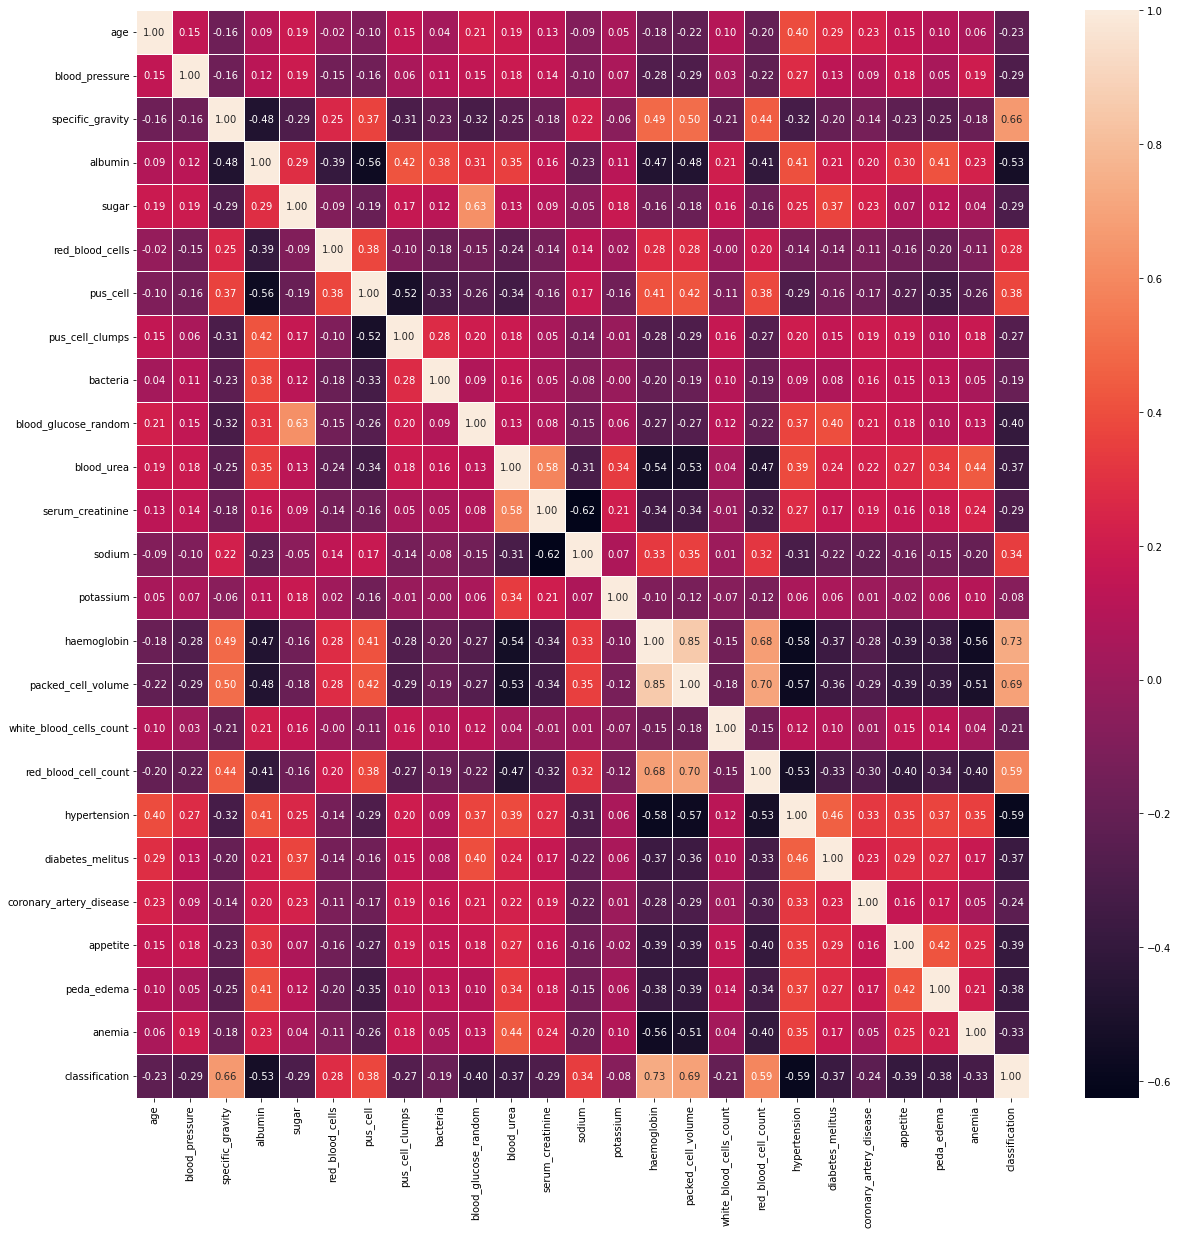

In [66]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(kidney_disease.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [67]:
kidney_disease.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cells_count,red_blood_cell_count,hypertension,diabetes_melitus,coronary_artery_disease,appetite,peda_edema,anemia,classification
age,1.000000,0.146830,-0.161959,0.087907,0.185221,-0.019305,-0.102595,0.154774,0.040733,0.213779,...,-0.217882,0.099872,-0.202618,0.396749,0.288366,0.228872,0.154683,0.095099,0.056215,-0.230926
blood_pressure,0.146830,1.000000,-0.164422,0.122541,0.190218,-0.151369,-0.156856,0.059560,0.112173,0.149100,...,-0.292714,0.026067,-0.220822,0.270447,0.134723,0.086618,0.177601,0.054083,0.194962,-0.290600
specific_gravity,-0.161959,-0.164422,1.000000,-0.479962,-0.292053,0.253894,0.365353,-0.306426,-0.231704,-0.317893,...,0.501064,-0.206884,0.443741,-0.323643,-0.196015,-0.135814,-0.230975,-0.253803,-0.184155,0.659504
albumin,0.087907,0.122541,-0.479962,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.310481,...,-0.475165,0.207303,-0.411122,0.406057,0.207831,0.200957,0.303145,0.411080,0.229556,-0.531562
sugar,0.185221,0.190218,-0.292053,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.629809,...,-0.181518,0.159034,-0.163871,0.254268,0.366795,0.229301,0.069216,0.116442,0.042464,-0.294555
red_blood_cells,-0.019305,-0.151369,0.253894,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.153076,...,0.280958,-0.002207,0.202455,-0.140538,-0.137087,-0.111493,-0.160868,-0.199285,-0.107625,0.282642
pus_cell,-0.102595,-0.156856,0.365353,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.262259,...,0.418580,-0.107886,0.383240,-0.291719,-0.155789,-0.172295,-0.274985,-0.350227,-0.260566,0.375154
pus_cell_clumps,0.154774,0.059560,-0.306426,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.197593,...,-0.294242,0.163456,-0.267982,0.195623,0.151595,0.188029,0.189688,0.104356,0.175861,-0.265313
bacteria,0.040733,0.112173,-0.231704,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.085940,...,-0.189822,0.103546,-0.192222,0.089046,0.077601,0.162395,0.149126,0.134732,0.052208,-0.186871
blood_glucose_random,0.213779,0.149100,-0.317893,0.310481,0.629809,-0.153076,-0.262259,0.197593,0.085940,1.000000,...,-0.267580,0.121371,-0.222568,0.369849,0.399033,0.212433,0.176132,0.101502,0.126854,-0.401374


In [88]:
from sklearn.preprocessing import LabelEncoder
for i in cat_cols:
    ("LABEL ENCODING OF:",i)
    LEi=LabelEncoder()
    print(c(kidney_disease[i]))
    kidney_disease[i]=LEi.fit_transform(kidney_disease[i])
    print(c(kidney_disease[i]))
    print("*"*100)

Counter({0: 339, 2: 18, 3: 14, 4: 13, 1: 13, 5: 3})
Counter({0: 339, 2: 18, 3: 14, 4: 13, 1: 13, 5: 3})
****************************************************************************************************
Counter({0: 253, 1: 147})
Counter({0: 253, 1: 147})
****************************************************************************************************
Counter({0: 318, 1: 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
Counter({0: 340, 1: 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
****************************************************************************************************
Counter({0: 358, 1: 42})
Counter({0: 358, 1: 42})
***************************************************************************************************

## Data Splitting
# TRAIN AND TEST SET

In [98]:
selcols=['age','blood_urea','coronary_artery_disease','anemia','pus_cell','red_blood_cells',
         'diabetes_melitus','peda_edema']

x=pd.DataFrame(kidney_disease,columns=selcols)
y=pd.DataFrame(kidney_disease,columns=['classification'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [100]:
x_train

,age,blood_urea,coronary_artery_disease,anemia,pus_cell,red_blood_cells,diabetes_melitus,peda_edema
205,61.0,28.0,0,0,1,1,4,0
354,32.0,17.0,0,0,1,1,3,0
3,48.0,56.0,0,1,0,1,3,1
264,42.0,24.0,0,0,1,1,3,0
194,80.0,49.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
299,73.0,48.0,0,0,1,1,3,0
22,48.0,163.0,0,1,0,1,3,0
72,64.0,35.0,0,0,0,1,4,1
15,40.0,162.0,0,1,1,1,3,0


In [101]:
y_train

,classification
205,0
354,1
3,0
264,1
194,0
...,...
299,1
22,0
72,0
15,0


## MODEL BUILDING

## Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver ='lbfgs',max_iter=500)
print('LogisticRegression\n')
model.fit(x_train.values,y_train.values.ravel())
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('confusion_matrix')    
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

LogisticRegression

confusion_matrix
[[48  0]
 [ 6 26]]


accuracy_score
0.925




## Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train , y_train)
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('RandomForest\n')
print('confusion_matrix')    
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

C:\Users\punit\AppData\Local\Temp/ipykernel_868/2865502932.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train , y_train)


RandomForest

confusion_matrix
[[51  1]
 [ 3 25]]


accuracy_score
0.95




## Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
print('Decision tree\n')
model.fit(x_train , y_train)
prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print('confusion_matrix')   
print(confusion_matrix(prediction,y_test))
print('\n')
print('accuracy_score')
print(accuracy_score(prediction,y_test))
print('\n')

Decision tree

confusion_matrix
[[51  4]
 [ 3 22]]


accuracy_score
0.9125




## Save the Model

In [108]:
pickle.dump(model,open('Chronic_Kidney_Disease.pk1','wb'))